<a href="https://colab.research.google.com/github/kajalburad750/Retail_DataAnalysis/blob/main/salesAnalysis4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd

In [12]:
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("/content/Sample - Superstore.csv.zip", encoding='latin1')
pd.set_option('display.max_columns', None)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [14]:
df = df.drop(['Row ID', 'Order ID', 'Ship Date', 'Customer ID', 'Customer Name','Product ID','Country','Postal Code'], axis=1)

In [15]:
df.head()

,Order Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,11/8/2016,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,11/8/2016,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,6/12/2016,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,10/11/2015,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,10/11/2015,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    9994 non-null   object 
 1   Ship Mode     9994 non-null   object 
 2   Segment       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Product Name  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1015.1+ KB


In [17]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [18]:
print(df.isnull().sum())
print("__________Duplicates__________")
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Removed Duplicates :")
print(df.duplicated().sum())

Order Date      0
Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64
__________Duplicates__________
1
Removed Duplicates :
0


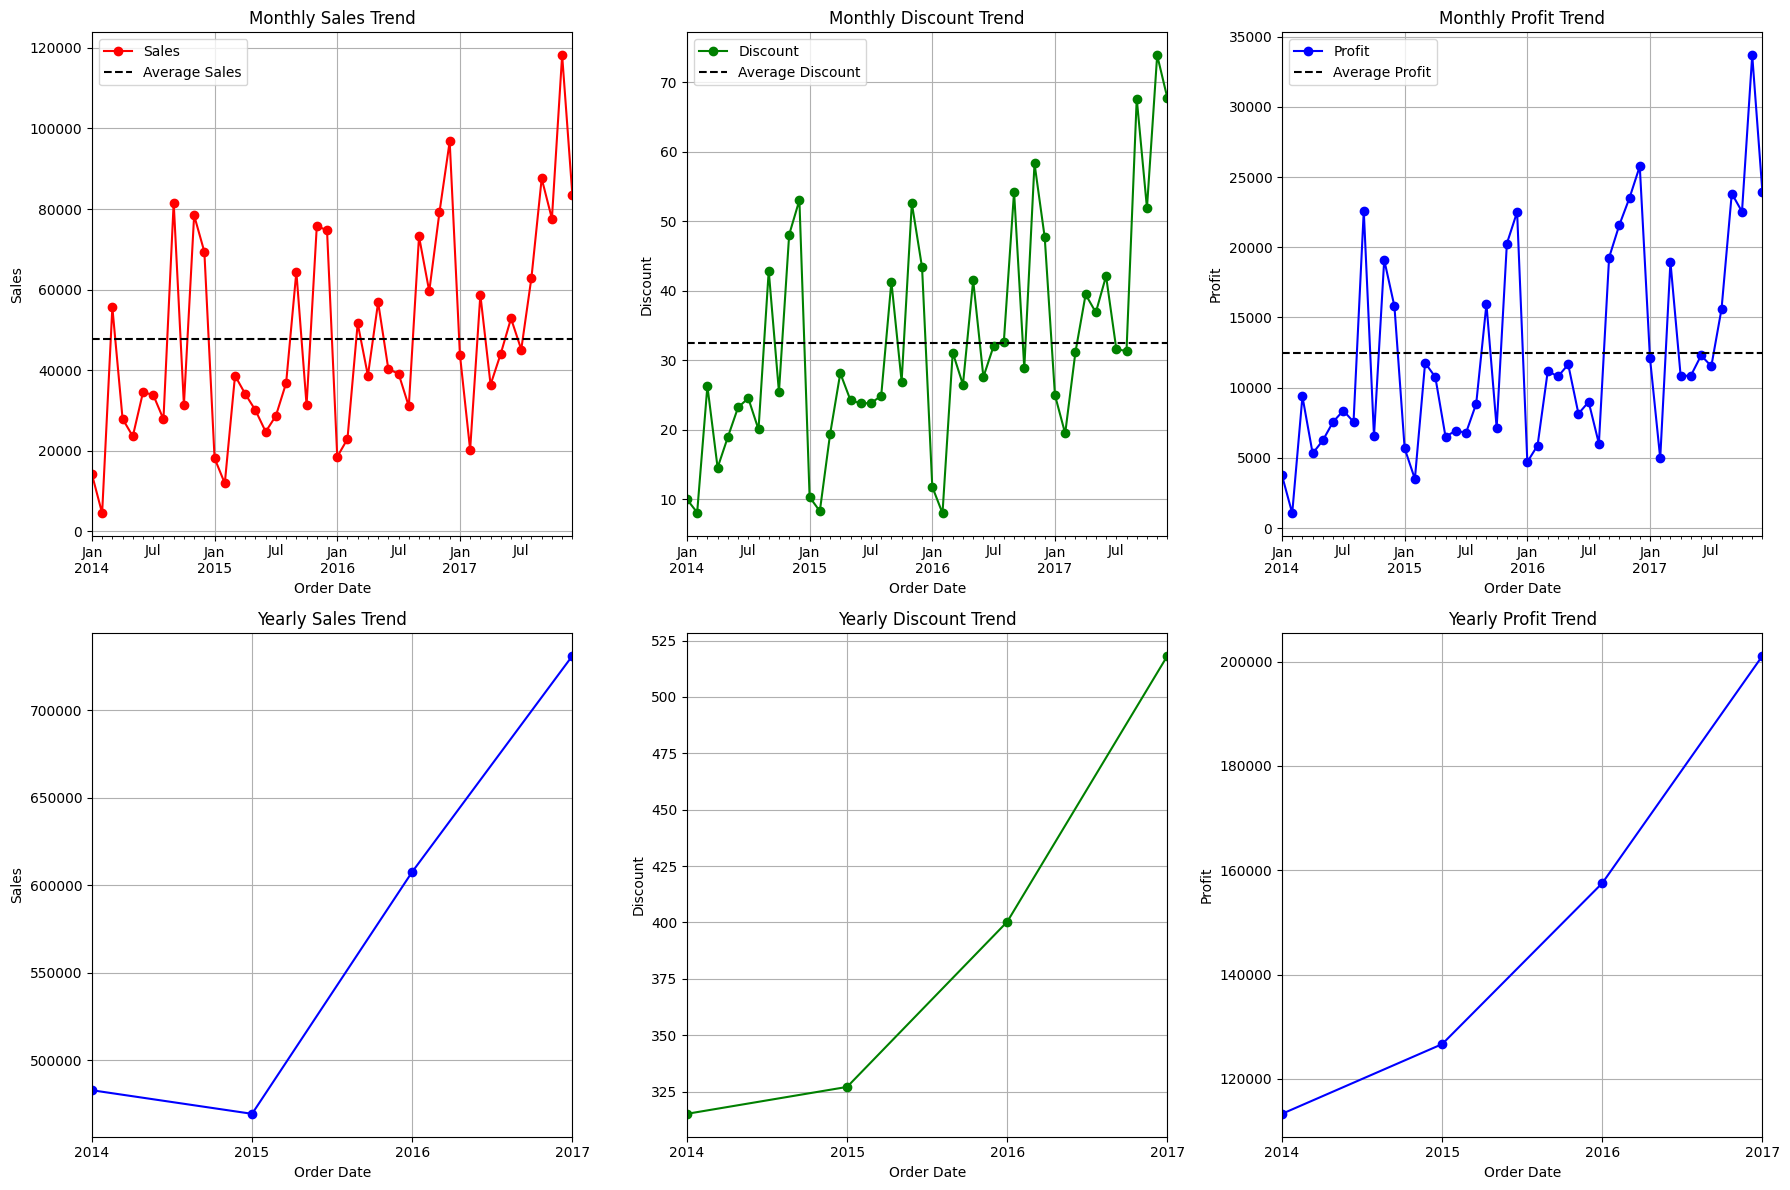

In [36]:
df['Profit'] = df['Profit'].abs()
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')


df['Order Date'] = pd.to_datetime(df['Order Date'])

monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_discount = df.groupby(df['Order Date'].dt.to_period('M'))['Discount'].sum()
monthly_profit = df.groupby(df['Order Date'].dt.to_period('M'))['Profit'].sum()
avg_sales = monthly_sales.mean()
avg_discount = monthly_discount.mean()
avg_profit = monthly_profit.mean()

yearly_sales = df.groupby(df['Order Date'].dt.to_period('Y'))['Sales'].sum()
yearly_discount = df.groupby(df['Order Date'].dt.to_period('Y'))['Discount'].sum()
yearly_profit = df.groupby(df['Order Date'].dt.to_period('Y'))['Profit'].sum()

plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend', color='red')

plt.axhline(y=avg_sales, color='black', linestyle='--', label='Average Sales')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 2)
monthly_discount.plot(kind='line', marker='o', title='Monthly Discount Trend', color='green')
plt.axhline(y=avg_discount, color='black', linestyle='--', label='Average Discount')
plt.xlabel('Order Date')
plt.ylabel('Discount')
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 3)
monthly_profit.plot(kind='line', marker='o', title='Monthly Profit Trend', color='blue')

plt.axhline(y=avg_profit, color='black', linestyle='--', label='Average Profit')
plt.xlabel('Order Date')
plt.ylabel('Profit')
plt.legend()
plt.grid(True)
plt.subplot(2, 3, 4)
yearly_sales.plot(kind='line', marker='o', title='Yearly Sales Trend', color='blue')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.grid(True)

plt.subplot(2, 3, 5)
yearly_discount.plot(kind='line', marker='o', title='Yearly Discount Trend', color='green')
plt.xlabel('Order Date')
plt.ylabel('Discount')
plt.grid(True)
plt.subplot(2, 3, 6)
yearly_profit.plot(kind='line', marker='o', title='Yearly Profit Trend', color='blue')
plt.xlabel('Order Date')
plt.ylabel('Profit')
plt.grid(True)

plt.tight_layout()
plt.show()